In [ ]:

import os
import collections
from pymatgen.core import Structure, Element
from pymatgen.analysis.local_env import CrystalNN
cif_directory = "./TEST_Classification"

crystal_environments = {}

cnn = CrystalNN()

for filename in os.listdir(cif_directory):
    if filename.endswith(".cif"):
        filepath = os.path.join(cif_directory, filename)
        
        structure = Structure.from_file(filepath)
        environment_counts = collections.Counter()

        for site in structure:
            element = Element(site.species_string)
            if element.is_metal:
                try:
                    site_index = structure.index(site)
                    environment = cnn.get_cn(structure, site_index)
                    nn_info = cnn.get_nn_info(structure, site_index)
                    neighbor_symbols = [neighbor['site'].specie.symbol for neighbor in nn_info]
                    neighbor_counter = collections.Counter(neighbor_symbols)               
                    flat_neighbors = []
                    for sym, cnt in sorted(neighbor_counter.items()):
                        flat_neighbors.extend([sym, cnt])
                    env_tuple = (element.symbol, environment, *flat_neighbors)
                    environment_counts[env_tuple] += 1
                except Exception as e:
                    print(f"Error determining environment for site in {filename}: {e}")
        if environment_counts:
            most_common_environment = environment_counts.most_common(1)[0][0]
            crystal_environments[filename] = most_common_environment
        else:
            crystal_environments[filename] = None

print("Crystal Environment Labels:")
for crystal, environment in crystal_environments.items():
    print(f"  Crystal: {crystal}, Environment: {environment}")


Crystal Environment Labels:
  Crystal: ATIBAG_clean.cif, Environment: ('Mn', 6, 'O', 6)
  Crystal: BAQWOI_clean.cif, Environment: ('Ag', 3, 'N', 3)
  Crystal: BETFEN_clean.cif, Environment: ('Pr', 7, 'O', 7)
  Crystal: BOMCUB_charged.cif, Environment: ('In', 8, 'O', 8)
  Crystal: AMUWIP_charged.cif, Environment: ('Cu', 4, 'N', 2, 'S', 2)
  Crystal: BEGDEY_clean.cif, Environment: ('Cu', 4, 'O', 4)
  Crystal: AXUHIL_clean.cif, Environment: ('Cd', 5, 'O', 5)
  Crystal: AHIYUN_clean.cif, Environment: ('Co', 6, 'O', 6)
  Crystal: ALUKUO_clean.cif, Environment: ('Eu', 6, 'O', 6)
  Crystal: BAKJEE_clean.cif, Environment: ('Co', 6, 'O', 6)
  Crystal: BEPREV01_clean.cif, Environment: ('Ni', 6, 'N', 1, 'O', 5)
  Crystal: ASIVAB_clean.cif, Environment: ('Cu', 4, 'O', 4)
  Crystal: AVIMIC_clean.cif, Environment: ('Zn', 4, 'O', 4)
  Crystal: BADJIC_clean.cif, Environment: ('Sc', 6, 'O', 6)
  Crystal: AWAJIT_clean.cif, Environment: ('Zn', 4, 'N', 2, 'O', 2)
  Crystal: acs.inorgchem.6b00136_ic6b00136

In [8]:
crystal_environments

{'ATIBAG_clean.cif': ('Mn', 6, 'O', 6),
 'BAQWOI_clean.cif': ('Ag', 3, 'N', 3),
 'BETFEN_clean.cif': ('Pr', 7, 'O', 7),
 'BOMCUB_charged.cif': ('In', 8, 'O', 8),
 'AMUWIP_charged.cif': ('Cu', 4, 'N', 2, 'S', 2),
 'BEGDEY_clean.cif': ('Cu', 4, 'O', 4),
 'AXUHIL_clean.cif': ('Cd', 5, 'O', 5),
 'AHIYUN_clean.cif': ('Co', 6, 'O', 6),
 'ALUKUO_clean.cif': ('Eu', 6, 'O', 6),
 'BAKJEE_clean.cif': ('Co', 6, 'O', 6),
 'BEPREV01_clean.cif': ('Ni', 6, 'N', 1, 'O', 5),
 'ASIVAB_clean.cif': ('Cu', 4, 'O', 4),
 'AVIMIC_clean.cif': ('Zn', 4, 'O', 4),
 'BADJIC_clean.cif': ('Sc', 6, 'O', 6),
 'AWAJIT_clean.cif': ('Zn', 4, 'N', 2, 'O', 2),
 'acs.inorgchem.6b00136_ic6b00136_si_002_clean.cif': ('Zn', 5, 'N', 1, 'O', 4),
 'ALOLET_charged.cif': ('In', 8, 'O', 8),
 'AXUJOT_clean.cif': ('W', 5, 'O', 5),
 'APEBED_clean.cif': ('Zn', 4, 'O', 4),
 'BOCTOE03_clean.cif': ('Mn', 6, 'N', 6),
 'ALUREF_clean.cif': ('Co', 6, 'N', 3, 'O', 3),
 'AQALOU_clean.cif': ('Sr', 5, 'O', 5),
 'AZOHEC_clean.cif': ('Zn', 4, 'N', 1, 

In [ ]:
import pandas as pd
df = pd.read_csv('2019-11-01-ASR-internal_14142.csv')
df['center'] = None
df['environment'] = None
def extract_center_environment(env_tuple):
    if env_tuple is None:
        return None, None

    center = env_tuple[0]

    environment = env_tuple[1:]
    return center, environment


for idx, row in df.iterrows():
    fname = row['filename']
    if not fname.endswith('.cif'):
        fname_key = fname + '.cif'
    else:
        fname_key = fname

    env_info = crystal_environments.get(fname_key, None)
    center_val, env_val = extract_center_environment(env_info)
    df.at[idx, 'center'] = center_val
    df.at[idx, 'environment'] = env_val
df.to_csv('output_with_environment.csv', index=False)


In [10]:
df_matched = df[df['center'].notnull()]
df_matched

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,center,environment
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.000,0.000,312.052,204.633,0.3792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Co,"(6, N, 2, O, 4)"
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.730,1505.310,409.494,431.444,0.6636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mn,"(5, Cl, 1, O, 4)"
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.420,1494.400,419.062,427.935,0.6638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Co,"(5, Cl, 1, O, 4)"
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.490,269.806,0.000,0.000,0.4118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tb,"(8, O, 8)"
6,ABESUX_clean,5.87931,4.42492,5.57015,3.742910,1747.690,466.934,0.000,0.000,0.5646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,"(5, O, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11924,BUCSIC01_clean,4.44124,3.57533,4.41189,1.506160,553.814,367.699,138.791,92.149,0.4836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fe,"(11, C, 11)"
11925,BUCTUQ_clean,5.34634,3.37407,5.34626,1.380900,523.325,378.975,0.000,0.000,0.4590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zn,"(1, Co, 1)"
11926,BUFPIC_clean,10.87605,5.84040,10.87567,1.225580,1934.230,1578.210,0.000,0.000,0.6710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cu,"(4, O, 4)"
11928,BUKMUQ_clean,5.78794,5.06217,5.71305,0.851411,2895.400,3400.710,0.000,0.000,0.7096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zn,"(3, N, 1, O, 2)"


In [ ]:
import pandas as pd
def environment_to_str(env):
    if env is None:
        return ""
    return "_".join(map(str, env))

df_matched['classification'] = df_matched.apply(
    lambda row: f"{row['center']}_{environment_to_str(row['environment'])}",
    axis=1
)

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [12]:
df_matched

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,center,environment,classification
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.000,0.000,312.052,204.633,0.3792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Co,"(6, N, 2, O, 4)",Co_6_N_2_O_4
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.730,1505.310,409.494,431.444,0.6636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mn,"(5, Cl, 1, O, 4)",Mn_5_Cl_1_O_4
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.420,1494.400,419.062,427.935,0.6638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Co,"(5, Cl, 1, O, 4)",Co_5_Cl_1_O_4
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.490,269.806,0.000,0.000,0.4118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tb,"(8, O, 8)",Tb_8_O_8
6,ABESUX_clean,5.87931,4.42492,5.57015,3.742910,1747.690,466.934,0.000,0.000,0.5646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,"(5, O, 5)",U_5_O_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11924,BUCSIC01_clean,4.44124,3.57533,4.41189,1.506160,553.814,367.699,138.791,92.149,0.4836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fe,"(11, C, 11)",Fe_11_C_11
11925,BUCTUQ_clean,5.34634,3.37407,5.34626,1.380900,523.325,378.975,0.000,0.000,0.4590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zn,"(1, Co, 1)",Zn_1_Co_1
11926,BUFPIC_clean,10.87605,5.84040,10.87567,1.225580,1934.230,1578.210,0.000,0.000,0.6710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4
11928,BUKMUQ_clean,5.78794,5.06217,5.71305,0.851411,2895.400,3400.710,0.000,0.000,0.7096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zn,"(3, N, 1, O, 2)",Zn_3_N_1_O_2


In [ ]:

unique_label_count = df_matched['center'].nunique()
print(unique_label_count)


In [ ]:
def extract_neighbors_info(env):
    if not env:
        return None, None
    data = list(env)
    if len(data) < 3:
        return None, None

    neighbors = []
    total_count = 0
    for i in range(1, len(data), 2):
        neighbor_type = data[i]
        neighbor_count = data[i+1] if (i+1) < len(data) else 0
        neighbors.append(str(neighbor_type))
        total_count += neighbor_count
    neighbors_str = ",".join(neighbors)
    return neighbors_str, total_count


In [ ]:
import pandas as pd
df_matched[['neighbors', 'number_of_neighbors']] = df_matched.apply(
    lambda row: pd.Series(extract_neighbors_info(row['environment'])),
    axis=1
)
print(df_matched[['center', 'neighbors', 'number_of_neighbors']].head())


  center neighbors  number_of_neighbors
0     Co       N,O                  6.0
2     Mn      Cl,O                  5.0
3     Co      Cl,O                  5.0
4     Tb         O                  8.0
6      U         O                  5.0


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df_matched

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,center,environment,classification,neighbors,number_of_neighbors
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.000,0.000,312.052,204.633,0.3792,...,NaN,NaN,NaN,NaN,NaN,Co,"(6, N, 2, O, 4)",Co_6_N_2_O_4,"N,O",6.0
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.730,1505.310,409.494,431.444,0.6636,...,NaN,NaN,NaN,NaN,NaN,Mn,"(5, Cl, 1, O, 4)",Mn_5_Cl_1_O_4,"Cl,O",5.0
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.420,1494.400,419.062,427.935,0.6638,...,NaN,NaN,NaN,NaN,NaN,Co,"(5, Cl, 1, O, 4)",Co_5_Cl_1_O_4,"Cl,O",5.0
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.490,269.806,0.000,0.000,0.4118,...,NaN,NaN,NaN,NaN,NaN,Tb,"(8, O, 8)",Tb_8_O_8,O,8.0
6,ABESUX_clean,5.87931,4.42492,5.57015,3.742910,1747.690,466.934,0.000,0.000,0.5646,...,NaN,NaN,NaN,NaN,NaN,U,"(5, O, 5)",U_5_O_5,O,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11924,BUCSIC01_clean,4.44124,3.57533,4.41189,1.506160,553.814,367.699,138.791,92.149,0.4836,...,NaN,NaN,NaN,NaN,NaN,Fe,"(11, C, 11)",Fe_11_C_11,C,11.0
11925,BUCTUQ_clean,5.34634,3.37407,5.34626,1.380900,523.325,378.975,0.000,0.000,0.4590,...,NaN,NaN,NaN,NaN,NaN,Zn,"(1, Co, 1)",Zn_1_Co_1,Co,1.0
11926,BUFPIC_clean,10.87605,5.84040,10.87567,1.225580,1934.230,1578.210,0.000,0.000,0.6710,...,NaN,NaN,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4,O,4.0
11928,BUKMUQ_clean,5.78794,5.06217,5.71305,0.851411,2895.400,3400.710,0.000,0.000,0.7096,...,NaN,NaN,NaN,NaN,NaN,Zn,"(3, N, 1, O, 2)",Zn_3_N_1_O_2,"N,O",3.0


In [31]:
df_matched['classification2'] = df_matched.apply(
    lambda row: f"{row['center']}_{row['neighbors']}_{row['number_of_neighbors']}",
    axis=1
)


df_matched['classification3'] = df_matched.apply(
    lambda row: f"{row['center']}_{row['number_of_neighbors']}",
    axis=1
)


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [32]:
df_matched

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,center,environment,classification,neighbors,number_of_neighbors,classification2,classification3
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.000,0.000,312.052,204.633,0.3792,...,NaN,NaN,NaN,Co,"(6, N, 2, O, 4)",Co_6_N_2_O_4,"N,O",6.0,"Co_N,O_6.0",Co_6.0
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.730,1505.310,409.494,431.444,0.6636,...,NaN,NaN,NaN,Mn,"(5, Cl, 1, O, 4)",Mn_5_Cl_1_O_4,"Cl,O",5.0,"Mn_Cl,O_5.0",Mn_5.0
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.420,1494.400,419.062,427.935,0.6638,...,NaN,NaN,NaN,Co,"(5, Cl, 1, O, 4)",Co_5_Cl_1_O_4,"Cl,O",5.0,"Co_Cl,O_5.0",Co_5.0
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.490,269.806,0.000,0.000,0.4118,...,NaN,NaN,NaN,Tb,"(8, O, 8)",Tb_8_O_8,O,8.0,Tb_O_8.0,Tb_8.0
6,ABESUX_clean,5.87931,4.42492,5.57015,3.742910,1747.690,466.934,0.000,0.000,0.5646,...,NaN,NaN,NaN,U,"(5, O, 5)",U_5_O_5,O,5.0,U_O_5.0,U_5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11924,BUCSIC01_clean,4.44124,3.57533,4.41189,1.506160,553.814,367.699,138.791,92.149,0.4836,...,NaN,NaN,NaN,Fe,"(11, C, 11)",Fe_11_C_11,C,11.0,Fe_C_11.0,Fe_11.0
11925,BUCTUQ_clean,5.34634,3.37407,5.34626,1.380900,523.325,378.975,0.000,0.000,0.4590,...,NaN,NaN,NaN,Zn,"(1, Co, 1)",Zn_1_Co_1,Co,1.0,Zn_Co_1.0,Zn_1.0
11926,BUFPIC_clean,10.87605,5.84040,10.87567,1.225580,1934.230,1578.210,0.000,0.000,0.6710,...,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4,O,4.0,Cu_O_4.0,Cu_4.0
11928,BUKMUQ_clean,5.78794,5.06217,5.71305,0.851411,2895.400,3400.710,0.000,0.000,0.7096,...,NaN,NaN,NaN,Zn,"(3, N, 1, O, 2)",Zn_3_N_1_O_2,"N,O",3.0,"Zn_N,O_3.0",Zn_3.0


In [ ]:

unique_label_count_1 = df_matched['classification'].nunique()
unique_label_count_2 = df_matched['classification2'].nunique()
unique_label_count_3 = df_matched['classification3'].nunique()
print(unique_label_count_1)
print( unique_label_count_2)
print(unique_label_count_3)


In [30]:
K = df_matched['number_of_neighbors'].nunique()
T = df_matched['center'].nunique()
print(T)
print(K)

52
12


In [ ]:
import pandas as pd

top3_classifications = df_matched['classification3'].value_counts().head(3).index.tolist()
print(top3_classifications)


In [ ]:
df_top3 = df_matched[df_matched['classification3'].isin(top3_classifications)]
df_top3


,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,center,environment,classification,neighbors,number_of_neighbors,classification2,classification3
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.000,0.000,312.052,204.633,0.3792,...,NaN,NaN,NaN,Co,"(6, N, 2, O, 4)",Co_6_N_2_O_4,"N,O",6.0,"Co_N,O_6.0",Co_6.0
8,ABETIN_clean,9.47418,7.83744,9.45292,0.597233,2275.990,3810.890,0.000,0.000,0.7302,...,NaN,NaN,NaN,Cu,"(4, N, 4)",Cu_4_N_4,N,4.0,Cu_N_4.0,Cu_4.0
18,ABIYIV_clean,4.33176,3.82431,4.32093,1.346610,564.007,418.836,0.000,0.000,0.4458,...,NaN,NaN,NaN,Co,"(6, N, 3, O, 3)",Co_6_N_3_O_3,"N,O",6.0,"Co_N,O_6.0",Co_6.0
20,ABUWOJ_clean,5.07969,4.03039,4.98773,1.158330,1745.230,1506.680,0.000,0.000,0.6210,...,NaN,NaN,NaN,Zn,"(4, O, 4)",Zn_4_O_4,O,4.0,Zn_O_4.0,Zn_4.0
29,ACIBIY_clean,5.10081,3.73403,5.09695,1.735150,912.456,525.866,0.000,0.000,0.4594,...,NaN,NaN,NaN,Co,"(6, O, 6)",Co_6_O_6,O,6.0,Co_O_6.0,Co_6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,BIHRER_clean,6.18450,3.26807,6.17281,1.253220,0.000,0.000,707.655,564.668,0.4676,...,NaN,NaN,NaN,Cu,"(4, N, 4)",Cu_4_N_4,N,4.0,Cu_N_4.0,Cu_4.0
11909,BIPBAF_clean,10.29487,6.42172,10.29451,0.781793,2351.030,3007.230,0.000,0.000,0.7276,...,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4,O,4.0,Cu_O_4.0,Cu_4.0
11919,BOSHIC_clean,11.35851,4.44127,11.35851,0.998372,1829.810,1832.790,0.000,0.000,0.6236,...,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4,O,4.0,Cu_O_4.0,Cu_4.0
11926,BUFPIC_clean,10.87605,5.84040,10.87567,1.225580,1934.230,1578.210,0.000,0.000,0.6710,...,NaN,NaN,NaN,Cu,"(4, O, 4)",Cu_4_O_4,O,4.0,Cu_O_4.0,Cu_4.0


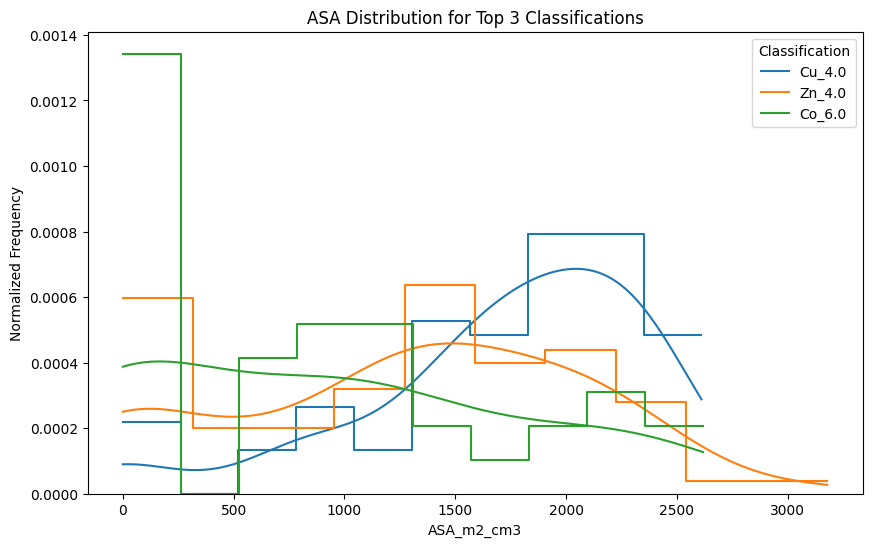

In [ ]:
plt.figure(figsize=(10, 6))
for cls in top3_classifications:
    data = df_top3[df_top3['classification3'] == cls]['ASA_m2_cm3'].dropna()
    sns.histplot(data, kde=True, stat="density", label=cls, element="step", fill=False,bins=10)

plt.xlabel('ASA_m2_cm3')
plt.ylabel('Normalized Frequency')
plt.title('ASA Distribution for Top 3 Classifications')
plt.legend(title='Classification')
plt.show()


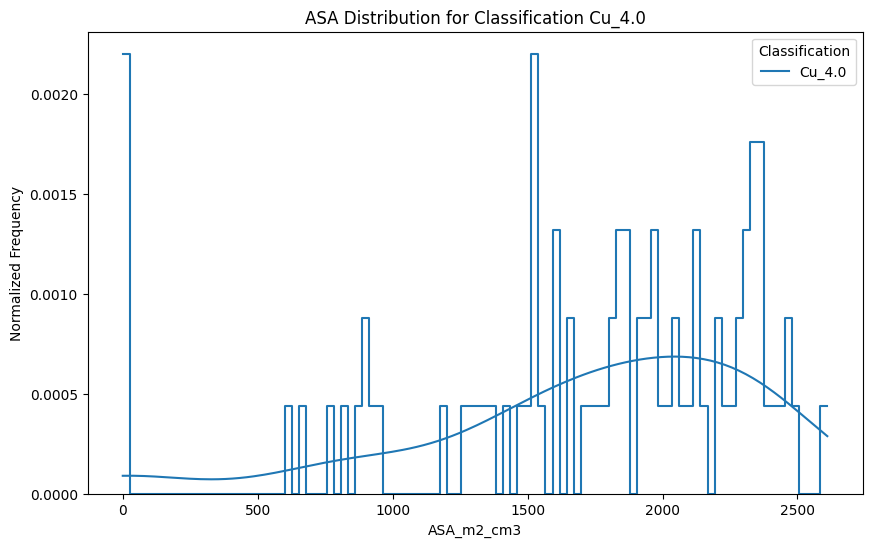

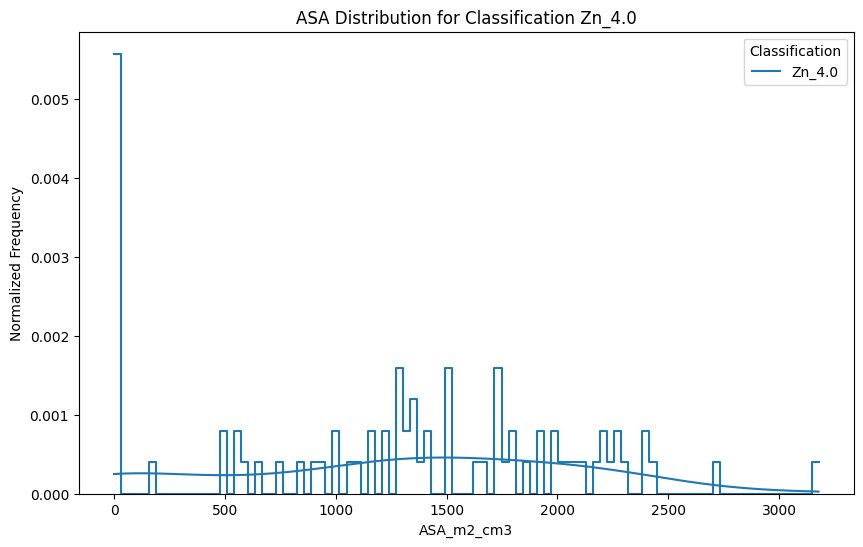

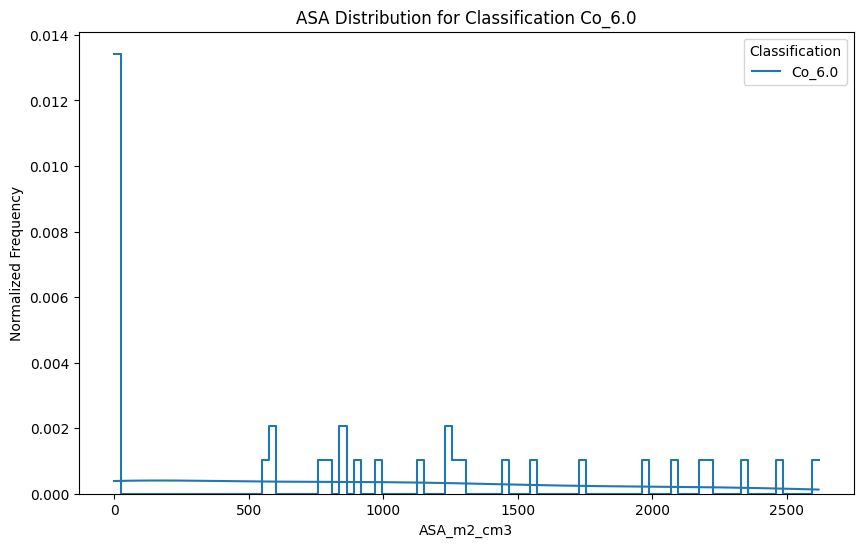

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cls in top3_classifications:
    plt.figure(figsize=(10, 6))
    

    data = df_top3[df_top3['classification3'] == cls]['ASA_m2_cm3'].dropna()
    

    sns.histplot(data, kde=True, stat="density", label=cls, element="step", fill=False, bins=100)
    

    plt.xlabel('ASA_m2_cm3')
    plt.ylabel('Normalized Frequency')
    plt.title(f'ASA Distribution for Classification {cls}')
    plt.legend(title='Classification')
    

    plt.show()


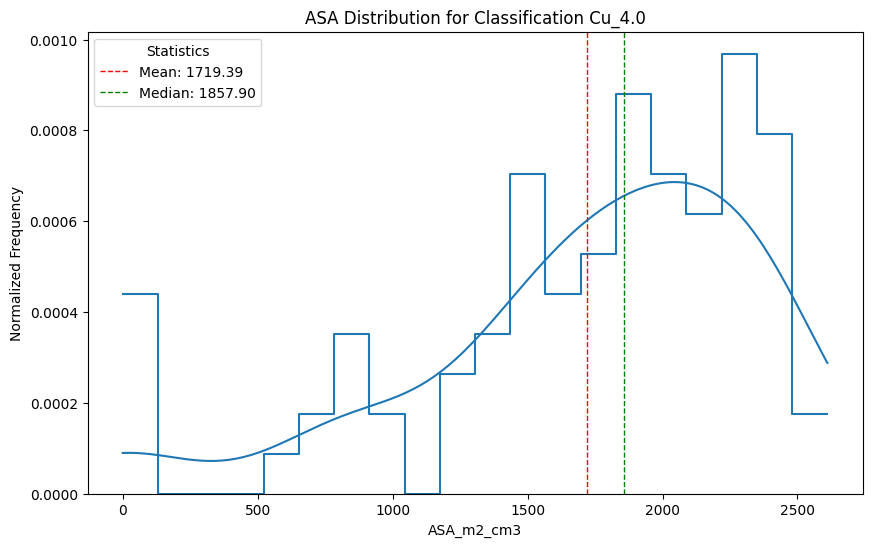

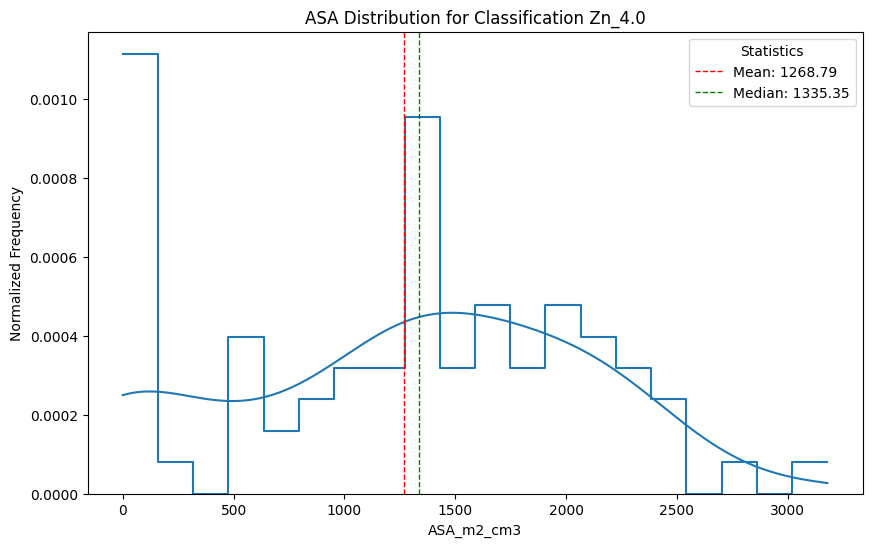

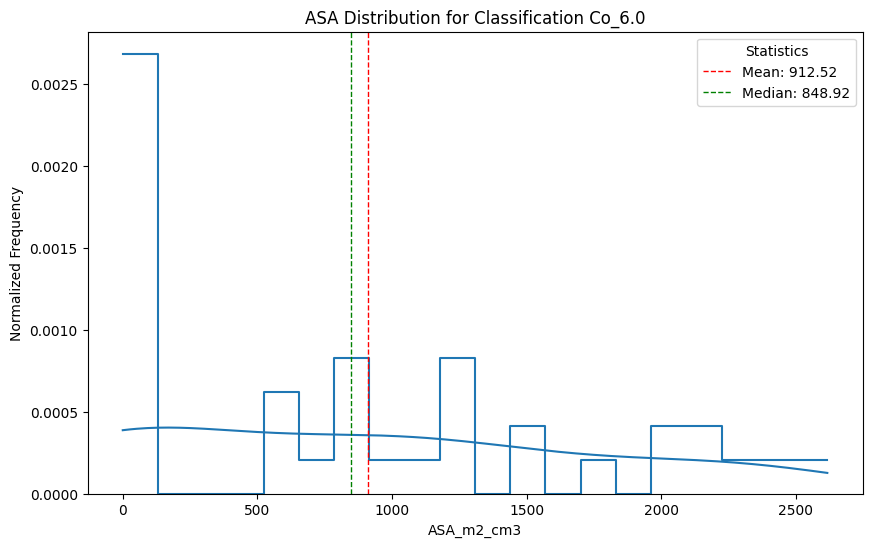

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


for cls in top3_classifications:
    plt.figure(figsize=(10, 6))
    

    data = df_top3[df_top3['classification3'] == cls]['ASA_m2_cm3'].dropna()
    

    sns.histplot(data, kde=True, stat="density", element="step", fill=False, bins=20)
    

    mean_val = data.mean()
    median_val = data.median()
    

    plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    

    plt.xlabel('ASA_m2_cm3')
    plt.ylabel('Normalized Frequency')
    #plt.xlim(0,2600)
    #plt.ylim(0,0.01)
    plt.title(f'ASA Distribution for Classification {cls}')
    

    plt.legend(title='Statistics')
    

    plt.show()
    
plt.savefig('M_#N_A_#nA_B_#nB.png')


In [57]:
count = df['All_Metals'].str.contains('Zn').sum()
count

3091

In [ ]:
top_counts = df_matched['classification3'].value_counts().head(100)
for element, count in top_counts.items():
    print(f"{element}：{count}")

Cu_4.0：87
Zn_4.0：79
Co_6.0：37
Cu_5.0：37
Mn_6.0：33
Zn_5.0：30
Ni_6.0：23
Co_4.0：22
Cd_6.0：22
Co_5.0：17
Cu_3.0：15
Ag_4.0：15
Al_4.0：11
Cd_5.0：10
Mn_5.0：10
Cd_4.0：10
Ni_5.0：9
Zn_3.0：9
La_7.0：9
Cd_7.0：9
Tb_7.0：8
Fe_6.0：8
Tb_8.0：8
Ag_3.0：8
In_8.0：8
Ni_4.0：7
V_5.0：7
Tb_6.0：7
U_5.0：7
Cu_6.0：7
Mn_4.0：7
Zn_6.0：7
Gd_7.0：6
Eu_7.0：6
Sc_6.0：6
Ce_7.0：6
Fe_11.0：5
Gd_6.0：5
La_8.0：5
Zr_8.0：5
Ho_8.0：5
Nd_6.0：4
Dy_8.0：4
Zr_6.0：4
Au_2.0：4
Cu_1.0：4
Cd_3.0：4
Ag_2.0：4
Sm_7.0：4
Mo_5.0：4
Nd_7.0：4
W_5.0：3
Mg_6.0：3
Co_2.0：3
Li_4.0：3
Gd_8.0：3
Eu_8.0：3
Mg_4.0：3
Dy_7.0：3
Cr_5.0：3
Ce_6.0：3
Na_4.0：3
Ho_6.0：3
Ce_8.0：3
Ba_7.0：3
Ca_6.0：3
Pr_6.0：3
Th_8.0：2
U_4.0：2
Mo_6.0：2
Sm_8.0：2
Er_8.0：2
Pd_4.0：2
Er_5.0：2
K_6.0：2
La_5.0：2
Cu_2.0：2
Ba_10.0：2
Zr_7.0：2
Ca_4.0：2
Ag_1.0：2
Pr_7.0：2
In_5.0：2
Ag_5.0：2
Co_3.0：2
V_6.0：2
Cd_8.0：2
Tm_6.0：2
Na_3.0：2
Zn_1.0：2
Eu_9.0：2
La_9.0：2
Yb_5.0：2
Mn_2.0：2
Na_6.0：2
Ti_5.0：2
Eu_6.0：2
Ce_9.0：2
V_4.0：2
Ga_4.0：2
